In [1]:
#https://www.kaggle.com/biphili/hospitality-in-era-of-airbnb/notebook
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data=pd.read_csv("AB_NYC_2019.csv")
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
data.shape

(48895, 16)

In [21]:
#missing data
total=data.isnull().sum().sort_values(ascending=False)
percent=((data.isnull().sum())*100)/data.isnull().count().sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,sort=False,keys=['total','percent'])
missing_data.head()

,total,percent
reviews_per_month,10052,20.558339
last_review,10052,20.558339
host_name,21,0.042949
name,16,0.032723
availability_365,0,0.000000


In [22]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1,0.58829,-0.00312529,0.0909085,0.0106187,-0.0132245,-0.31976,0.291828,0.133272,0.0854676
host_id,0.58829,1,0.0202242,0.127055,0.0153091,-0.0173643,-0.140106,0.296417,0.15495,0.203492
latitude,-0.00312529,0.0202242,1,0.0847884,0.0339387,0.0248693,-0.0153888,-0.0101416,0.0195174,-0.0109835
longitude,0.0909085,0.127055,0.0847884,1,-0.150019,-0.0627471,0.0590943,0.145948,-0.114713,0.0827307
price,0.0106187,0.0153091,0.0339387,-0.150019,1,0.0427993,-0.0479542,-0.0306083,0.0574717,0.0818288
minimum_nights,-0.0132245,-0.0173643,0.0248693,-0.0627471,0.0427993,1,-0.0801161,-0.121702,0.12796,0.144303
number_of_reviews,-0.31976,-0.140106,-0.0153888,0.0590943,-0.0479542,-0.0801161,1,0.549868,-0.0723761,0.172028
reviews_per_month,0.291828,0.296417,-0.0101416,0.145948,-0.0306083,-0.121702,0.549868,1,-0.00942116,0.185791
calculated_host_listings_count,0.133272,0.15495,0.0195174,-0.114713,0.0574717,0.12796,-0.0723761,-0.00942116,1,0.225701
availability_365,0.0854676,0.203492,-0.0109835,0.0827307,0.0818288,0.144303,0.172028,0.185791,0.225701,1


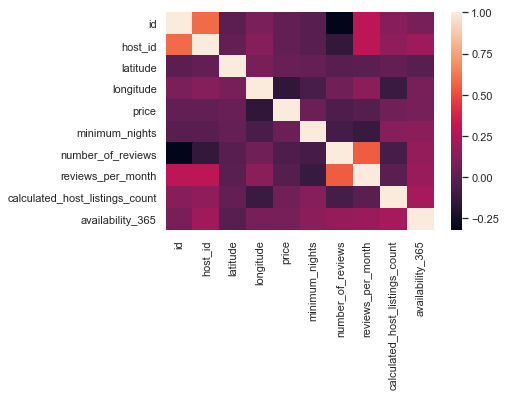

In [28]:
#데이터의 상관관계분석
#number_of_reviews와 review_per_month만 적당한 상관관계존재
sns.set(style='whitegrid')
sns.heatmap(data.corr())

data.corr().style.background_gradient(cmap='coolwarm')

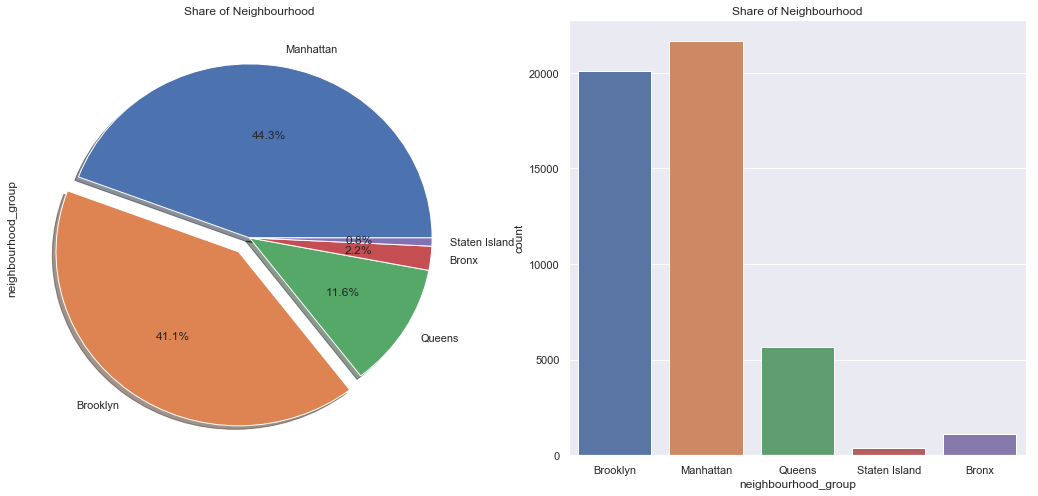

In [40]:
#hostel이 위치한 지역
sns.set(style='darkgrid')
#subplots-> figsize도 포함하는 경우(ax값도 반환함), 
#subplot도 존재 ex)subplot(5,3,1)->5,3 figure중 첫번째
_,ax=plt.subplots(1,2,figsize=(18,8))

#data['neighbourhood_group'].value_counts()->Series반환 
#pd data에 바로 .plot해서 그래프 표현가능
data['neighbourhood_group'].value_counts().plot.pie(explode=[0,0.1,0,0,0],
                                    autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Share of Neighbourhood')

#아래 두 코드는 같음 이때 한 열에 대한 다른 열을 count하고 싶다면 hue=data.~ 사용
#sns.countplot(x='neighbourhood_group',data=data,ax=ax[1],palette='rocket')
sns.countplot(x=data.neighbourhood_group,ax=ax[1])
ax[1].set_title('Share of Neighbourhood')
plt.show()

<IPython.core.display.Javascript object>


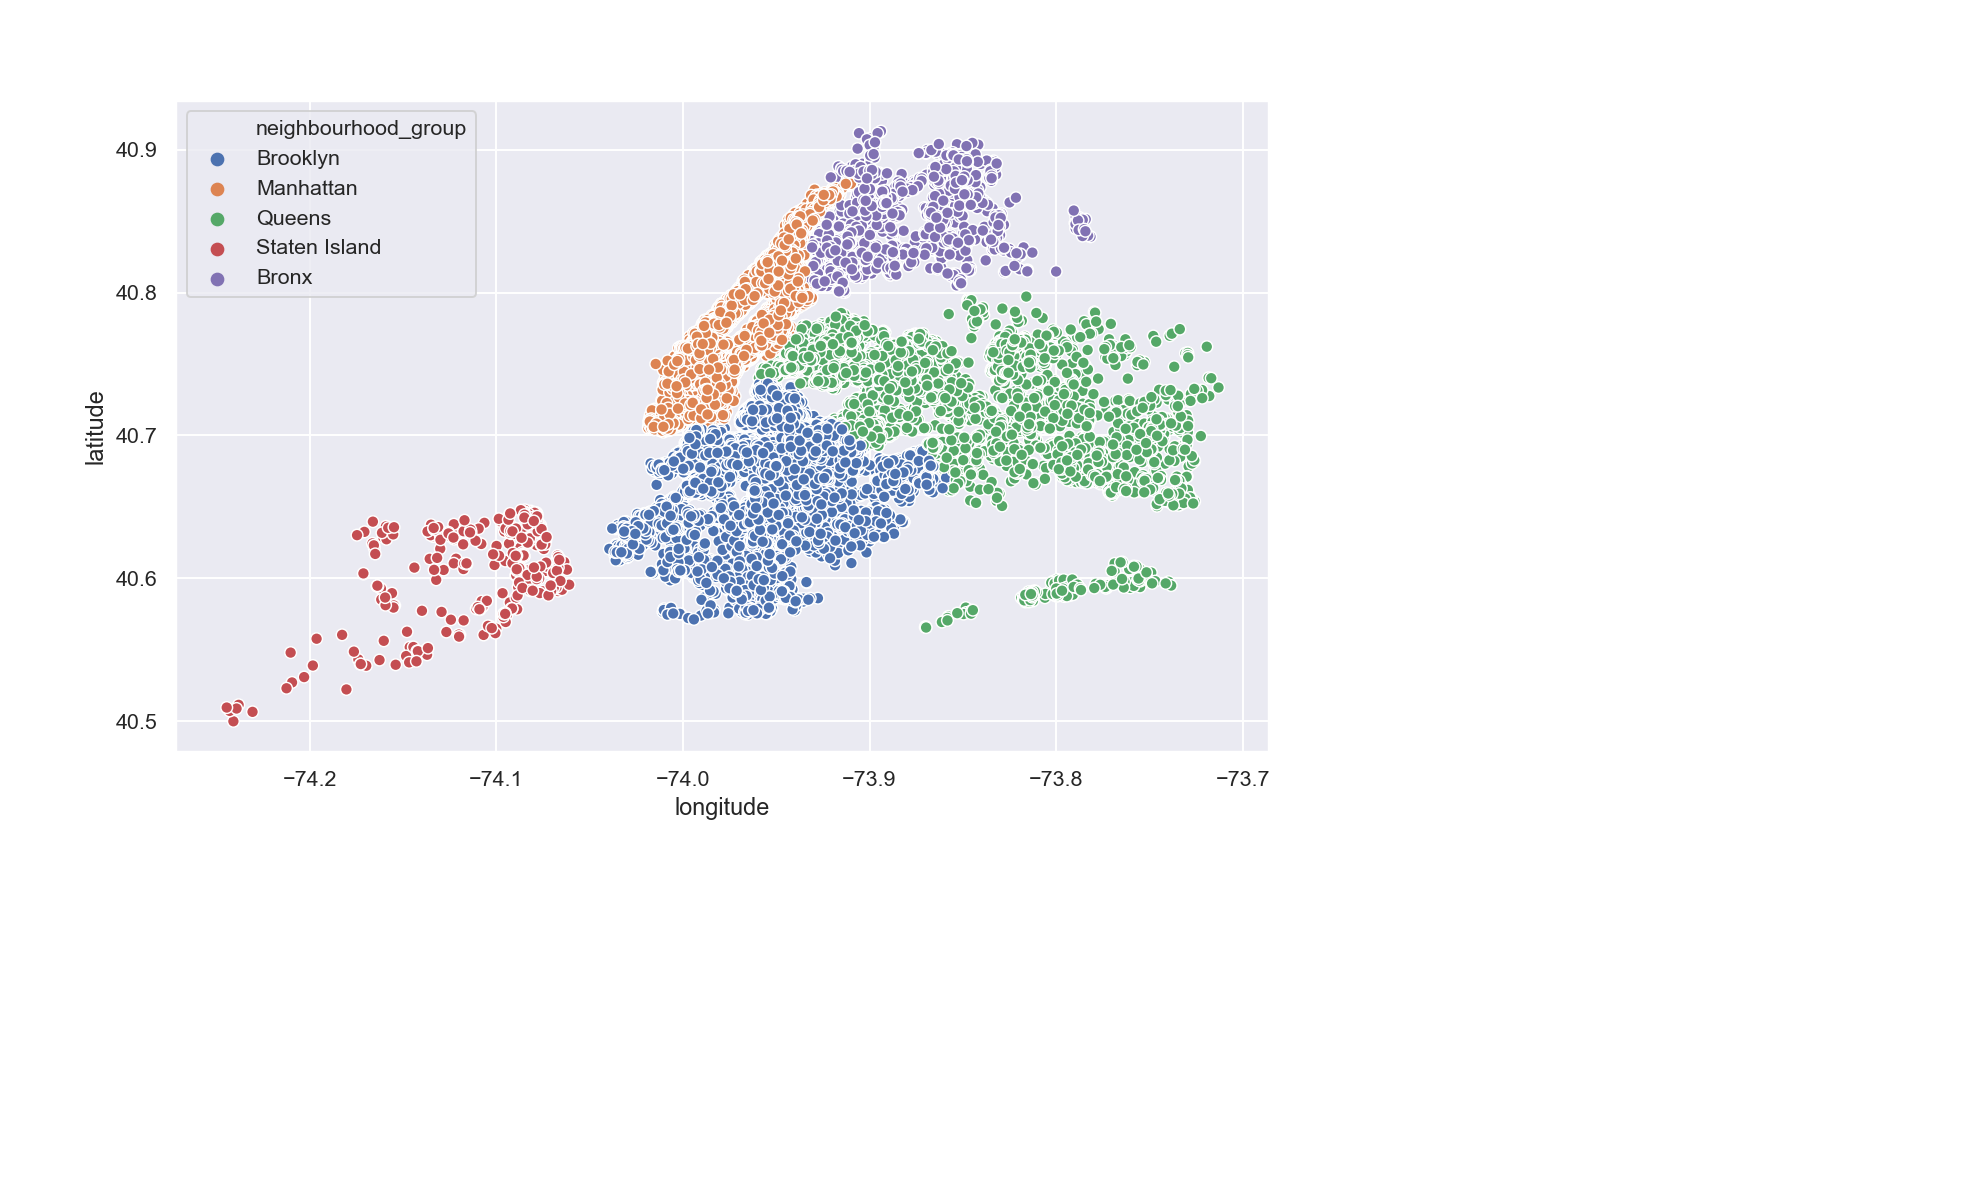

In [93]:
#위도 경도에 대한 위치 분류
plt.figure(figsize=(10,6))
sns.scatterplot(data.longitude,data.latitude,hue=data.neighbourhood_group)
plt.show()

In [79]:
import folium
from folium.plugins import HeatMap

#북위40도 71' 28'' 서경74도 00' 60''
m=folium.Map([40.7128,-74.0060],zoom_start=11)
#data[['latitude','longitude']] ->2차원
HeatMap(data[['latitude','longitude']],radius=8,
        gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
m.save('map_heatmap.html')

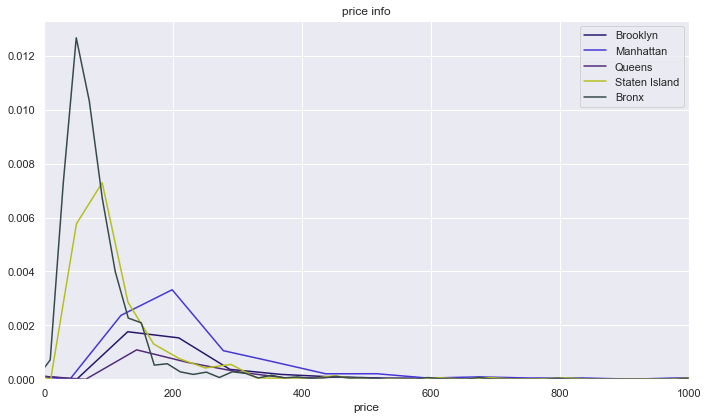

In [97]:
import random
plt.figure(figsize=(10,6))
sns.set(style='darkgrid')
groups=data.neighbourhood_group.unique()
for group in groups:
    color='#'+''.join([random.choice('123456789ABCDEF') for j in range(6)])
    sns.distplot(data[data.neighbourhood_group==group].price,
             color=color,hist=False,label=group)
plt.xlim(0,1000)
plt.title('price info')
plt.tight_layout()
plt.show()

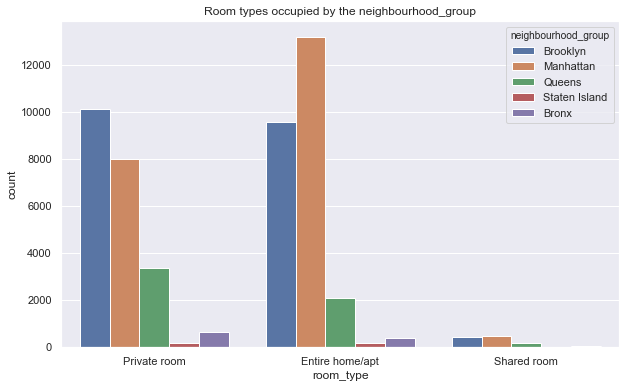

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'room_type',hue = "neighbourhood_group",data = data)
plt.title("Room types occupied by the neighbourhood_group")
plt.show()

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x432 with 0 Axes>

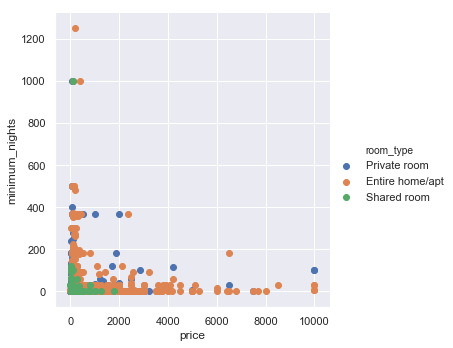

In [18]:
plt.figure(figsize=(10,6))
sns.FacetGrid(data,hue='room_type',size=5).map(plt.scatter,'price','minimum_nights').add_legend()
plt.show()

<Figure size 720x432 with 0 Axes>

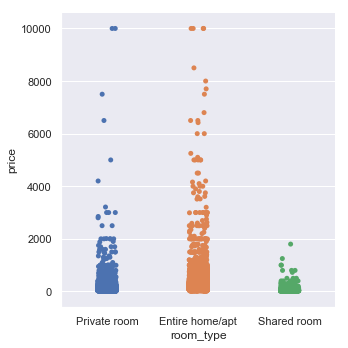

In [20]:
#각 방 타입 별 가격 catplot->각 방 타입별로 cat(concat)한다
plt.figure(figsize=(10,6))
sns.catplot(x='room_type',y='price',data=data)
plt.show()

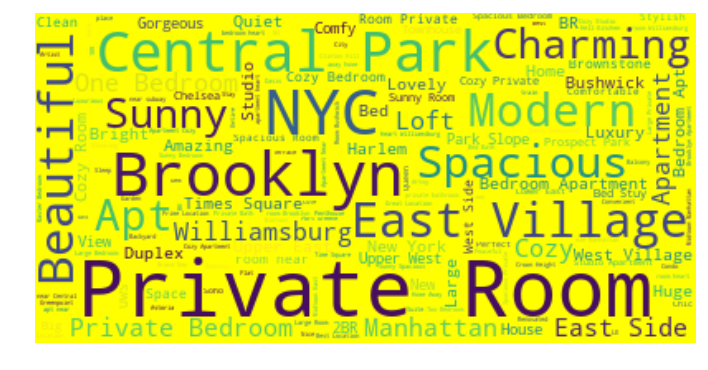

In [110]:
from wordcloud import WordCloud, ImageColorGenerator

text=' '.join(str(each) for each in data.name)
wordcloud=WordCloud(max_words=200,background_color='yellow').generate(text)
plt.figure(figsize=(10,6))
#plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation='bilinear')
#grid와 axis 제거
plt.axis('off')
plt.tight_layout()
plt.show()

[Text(0,0,'in'),
 Text(0,0,'room'),
 Text(0,0,'bedroom'),
 Text(0,0,'private'),
 Text(0,0,'apartment'),
 Text(0,0,'cozy'),
 Text(0,0,'the'),
 Text(0,0,'to'),
 Text(0,0,'studio'),
 Text(0,0,'brooklyn'),
 Text(0,0,'apt'),
 Text(0,0,'spacious'),
 Text(0,0,'1'),
 Text(0,0,'with'),
 Text(0,0,'2'),
 Text(0,0,'of'),
 Text(0,0,'east'),
 Text(0,0,'and'),
 Text(0,0,'manhattan'),
 Text(0,0,'&'),
 Text(0,0,'park'),
 Text(0,0,'sunny'),
 Text(0,0,'beautiful'),
 Text(0,0,'near'),
 Text(0,0,'williamsburg')]

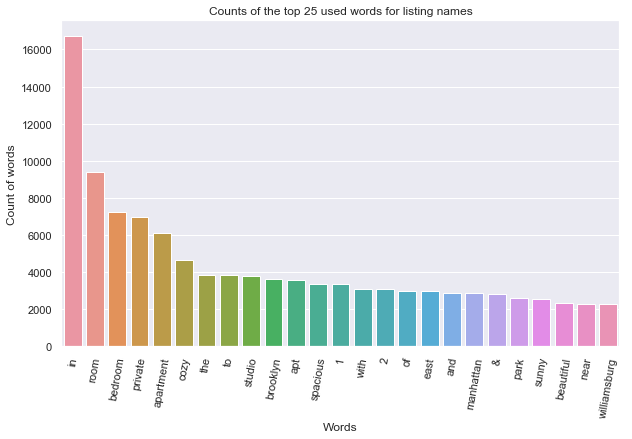

In [16]:
from collections import Counter
_names_=[]
for name in data.name:
    _names_.append(name)
def split_name(name):
    spl=str(name).split()
    return spl
_names_for_count_=[]
for x in _names_:
    for word in split_name(x):
        word=word.lower()
        _names_for_count_.append(word)
_top_25=Counter(_names_for_count_).most_common()
_top_25=_top_25[0:25]
sub_w=pd.DataFrame(_top_25)
sub_w.rename(columns={0:'word',1:'count'},inplace=True)
plt.figure(figsize=(10,6))
sns.set(style='darkgrid')
viz_5=sns.barplot(x='word',y='count',data=sub_w)
viz_5.set_title('Counts of the top 25 used words for listing names')
viz_5.set_ylabel('Count of words')
viz_5.set_xlabel('Words')
viz_5.set_xticklabels(viz_5.get_xticklabels(),rotation=80)

In [3]:
#결과 안나옴
import folium
from folium import plugins
print("Rooms with the most number of reviews")

df1=data.sort_values(by=['number_of_reviews'],ascending=False)

Lat=40.80
Long=73.80
map_df1=folium.Map([Lat,Long],zoon_start=10)
map_df1_rooms_map=plugins.MarkerCluster().add_to(map_df1)
for lat,long,label in zip(df1.latitude,df1.longitude,df1.name):
    folium.Marker(location=[lat,long],icon=folium.Icon(icon='home'),
                  popup=label).add_to(map_df1_rooms_map)
map_df1.add_child(map_df1_rooms_map)
map_df1.save("map2.html")

Rooms with the most number of reviews


In [40]:
#Linear Regression을 통한 price 예측

#데이터 전처리
data.drop(['name','id','host_name','last_review'],axis=1,inplace=True)
data['reviews_per_month']=data['reviews_per_month'].replace(np.nan,0)

In [14]:
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

In [20]:
#LabelEncoder->str로 된 특징을 숫자로 바꿔준다. 
#obj.classes_ 를 출력하면 숫자에 대한 str을 알 수 있음
#되돌릴 땐 obj.inverse_transform()
change_list=['neighbourhood_group','neighbourhood','room_type']
for i in change_list:
    le=preprocessing.LabelEncoder()
    le.fit(data[i])
    data[i]=le.transform(data[i])
data.sort_values(by='price',ascending=False,inplace=True)
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,3,4,40.76810,-73.91651,1,10000,100,2,2016-02-13,0.04,1,0
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,1,91,40.73260,-73.95739,0,10000,5,5,2017-07-27,0.16,1,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,2,202,40.77213,-73.98665,0,10000,30,0,NaN,NaN,1,83
40433,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,2,119,40.71980,-73.98566,0,9999,30,0,NaN,NaN,1,365
12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,2,119,40.71355,-73.98507,1,9999,99,6,2016-01-01,0.14,1,83


In [25]:
print(le.classes_," --> ",data['room_type'].unique())
print(list(le.inverse_transform(data['room_type']))[:10])

['Entire home/apt' 'Private room' 'Shared room']  -->  [1 0 2]
['Private room', 'Entire home/apt', 'Entire home/apt', 'Entire home/apt', 'Private room', 'Entire home/apt', 'Entire home/apt', 'Entire home/apt', 'Entire home/apt', 'Entire home/apt']


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [55]:
#price열을 종속변수, 나머지열을 독립변수로 두고 fitting

temp=list(data)  #행 정보 가져오기->obj.iloc[idx] 이용
temp.remove('price')
X=data[temp]
y=data['price']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [62]:
#선형회귀모형에 대한 예측 오차
predict=lm.predict(X_test)
print("""
        Mean Squared Error: {:.5f}
        R2 Score: {:.5f}
        Mean Absolute Error: {:.5f}
        """.format(np.sqrt(metrics.mean_squared_error(y_test,predict)),
                  metrics.r2_score(y_test,predict)*100,
                  metrics.mean_absolute_error(y_test,predict)))


        Mean Squared Error: 214.31929
        R2 Score: 10.57168
        Mean Absolute Error: 74.41011
        


In [64]:
#선형회귀모델 vs 실제 데이터
compare_data=pd.DataFrame({'Actual Values':np.array(y_test).flatten(),
                          'Predicted Values':predict.flatten()}).head(5)
compare_data

,Actual Values,Predicted Values
0,39,70.299886
1,85,165.162309
2,63,136.982640
3,100,154.713772
4,139,136.806438


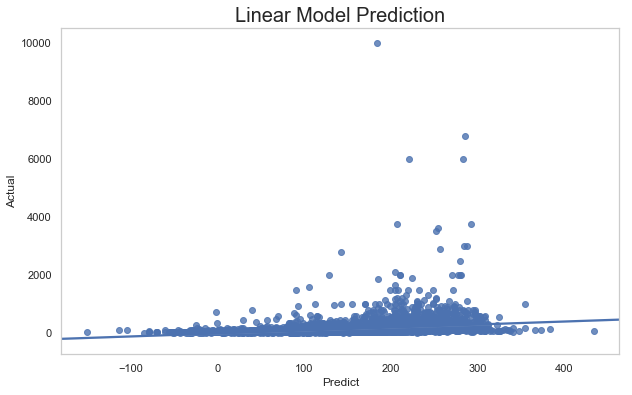

In [69]:
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')
sns.regplot(predict,y_test)
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.title("Linear Model Prediction",size=20)
plt.grid(False)
plt.show()

In [70]:
#Gradient Boosted Regressor
#경사하강법 이용, 모델을 하나씩 학습,예측하게 함
#모델에 대한 앙상블모델이 최종
GBoost=GradientBoostingRegressor(n_estimators=3000,learning_rate=0.01)
GBoost.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [71]:
predict2=GBoost.predict(X_test)
print("""
        Mean Squared Error: {:.5f}
        R2 Score: {:.5f}
        Mean Absolute Error: {:.5f}
        """.format(np.sqrt(metrics.mean_squared_error(y_test,predict2)),
                  metrics.r2_score(y_test,predict2)*100,
                  metrics.mean_absolute_error(y_test,predict2)))


        Mean Squared Error: 206.12433
        R2 Score: 17.27989
        Mean Absolute Error: 65.95373
        


In [72]:
compare_data2 = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': predict2.flatten()}).head(5)

compare_data2

,Actual Values,Predicted Values
0,39,41.191112
1,85,150.538210
2,63,83.313270
3,100,125.030025
4,139,142.623204


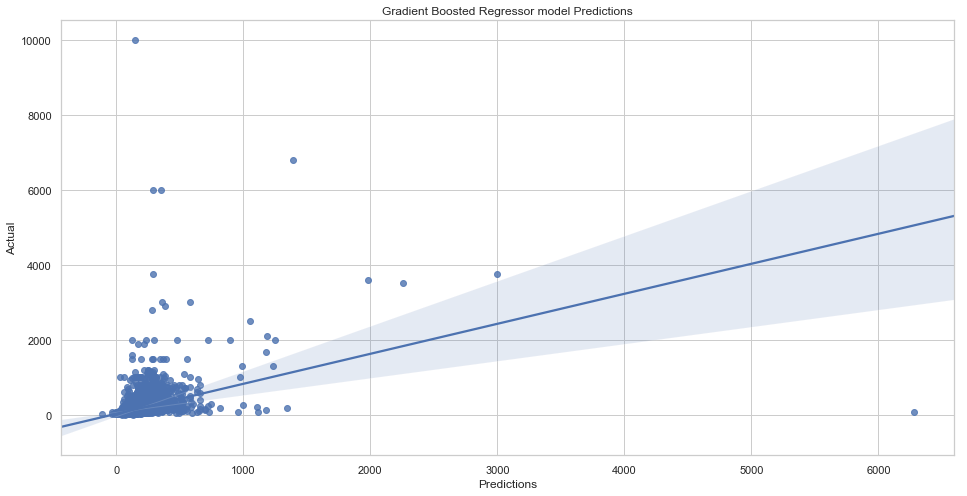

In [73]:
plt.figure(figsize=(16,8))
sns.regplot(predict2,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Gradient Boosted Regressor model Predictions")
plt.show()

In [74]:
print("Linear의 훈련: {:.5f}  테스트: {:.5f}".format(lm.score(X_train,y_train),lm.score(X_test,y_test)))
print("GBoost의 훈련: {:.5f}  테스트: {:.5f}".format(GBoost.score(X_train,y_train),GBoost.score(X_test,y_test)))

Linear의 훈련: 0.08747  테스트: 0.10572
GBoost의 훈련: 0.45191  테스트: 0.17280
